In [ ]:
!pip install visualkeras

import visualkeras
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from google.colab import drive

drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.7 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
num_classes = 10
input_shape = (32, 32, 3)
weight_decay = 0.0001
batch_size = 32
epoch = 100

In [ ]:
# Load the CIFAR10 dataset
(x_train_full , y_train_full), (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

# Split the full training set into a validation set and a (smaller) training set
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Train Images', x_train.shape[0])
print('Val Images', x_val.shape[0])
print('Test Images', x_test.shape[0])

Train Images 40000
Val Images 10000
Test Images 10000


In [ ]:
def normalize(x):
    return x.astype('float32') / 255.0

datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)

In [ ]:
x_train = normalize(x_train)
x_val = normalize(x_val)
x_test = normalize(x_test)


y_train = to_categorical(y_train , num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test , num_classes)


datagen.fit(x_train)

In [ ]:
def save_results(history):
  # Plot training and validation accuracy.
  plt.figure(figsize=(10,6))
  sb.set_style("whitegrid")
  plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
  plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
  plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='lower right')
  plt.savefig('/content/gdrive/My Drive/Image Classification/without_tuning/train_val_acc_2.png')
  plt.show()

  # Plot training and validation loss.
  plt.figure(figsize=(10,6))
  sb.set_style("whitegrid")
  plt.plot(history.history['loss'],color="Purple",marker='o')
  plt.plot(history.history['val_loss'],color='Orange',marker='h')
  plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.savefig('/content/gdrive/My Drive/Image Classification/without_tuning/train_val_loss_2.png')
  plt.show()

In [ ]:
class CustomModel:
    def __init__(self, input_shape, num_classes, weight_decay):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.weight_decay = weight_decay

    def create_model(self):
      custom_model = Sequential([Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), 
                                 input_shape=input_shape),
                          BatchNormalization(),
                          Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                          BatchNormalization(),
                          MaxPooling2D((2, 2)),
                          Dropout(0.2),

                          Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                          BatchNormalization(),
                          Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                          BatchNormalization(),
                          MaxPooling2D((2, 2)),
                          Dropout(0.3),

                          Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                          BatchNormalization(),
                          Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                          BatchNormalization(),
                          MaxPooling2D((2, 2)),
                          Dropout(0.4),

                          Flatten(),
                          Dense(256, activation='relu'),
                          BatchNormalization(),
                          Dropout(0.5),
                          Dense(num_classes, activation='softmax')])

      return custom_model

custom_model = CustomModel(input_shape=input_shape, num_classes=num_classes, weight_decay=weight_decay).create_model()

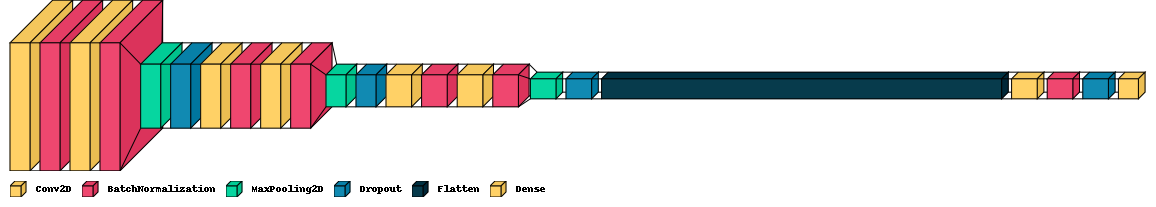

In [ ]:

visualkeras.layered_view(custom_model, legend=True, to_file='/content/gdrive/My Drive/Image Classification/without_tuning/visual_final_model_2.png').show()


In [ ]:
custom_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=['accuracy'])

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', 
                               patience=10,
                               cooldown=1,
                               verbose=1),
             EarlyStopping(monitor='val_loss',
                           patience=15,
                           verbose=1)]

In [ ]:
history = custom_model.fit(
    datagen.flow(x_train , y_train , batch_size = batch_size), 
    epochs = epoch, 
    validation_data = (x_val, y_val), 
    callbacks=callbacks)


Epoch 1/100
1250/1250 [==============================] - 57s 29ms/step - loss: 2.0724 - accuracy: 0.3781 - val_loss: 1.8014 - val_accuracy: 0.4236 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - 37s 29ms/step - loss: 1.7002 - accuracy: 0.5030 - val_loss: 1.8326 - val_accuracy: 0.5201 - lr: 0.0100
Epoch 3/100
1250/1250 [==============================] - 34s 27ms/step - loss: 1.6785 - accuracy: 0.5512 - val_loss: 1.8348 - val_accuracy: 0.5341 - lr: 0.0100
Epoch 4/100
1250/1250 [==============================] - 35s 28ms/step - loss: 1.6894 - accuracy: 0.5580 - val_loss: 3.0414 - val_accuracy: 0.3343 - lr: 0.0100
Epoch 5/100
1250/1250 [==============================] - 33s 27ms/step - loss: 1.7231 - accuracy: 0.5612 - val_loss: 1.6984 - val_accuracy: 0.5662 - lr: 0.0100
Epoch 6/100
1250/1250 [==============================] - 35s 28ms/step - loss: 1.5501 - accuracy: 0.5801 - val_loss: 1.3712 - val_accuracy: 0.6325 - lr: 0.0100
Epoch 7/100
1250/1250 [=================

In [ ]:
test_loss, test_acc = custom_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (test_acc*100))
print("Test Loss: %.2f%%" % (test_loss*100))

Test Accuracy: 79.48%
Test Loss: 69.02%


In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))

Best epoch: 77


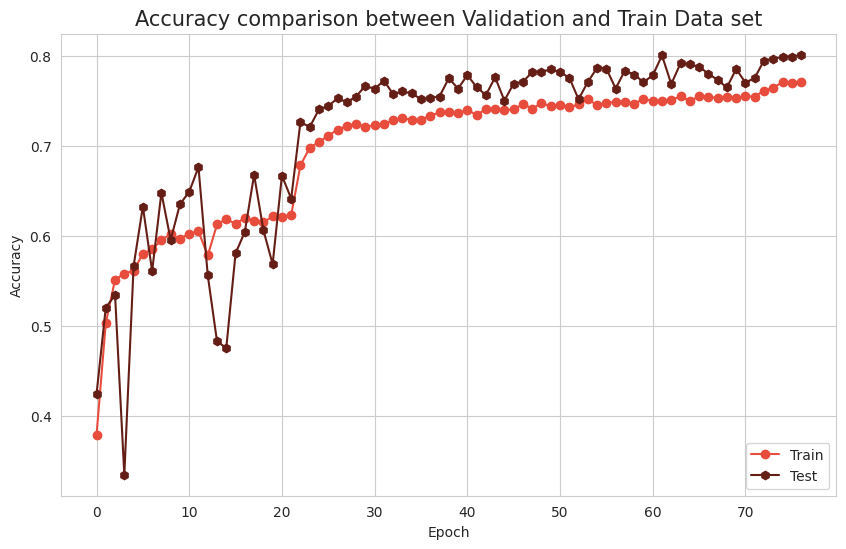

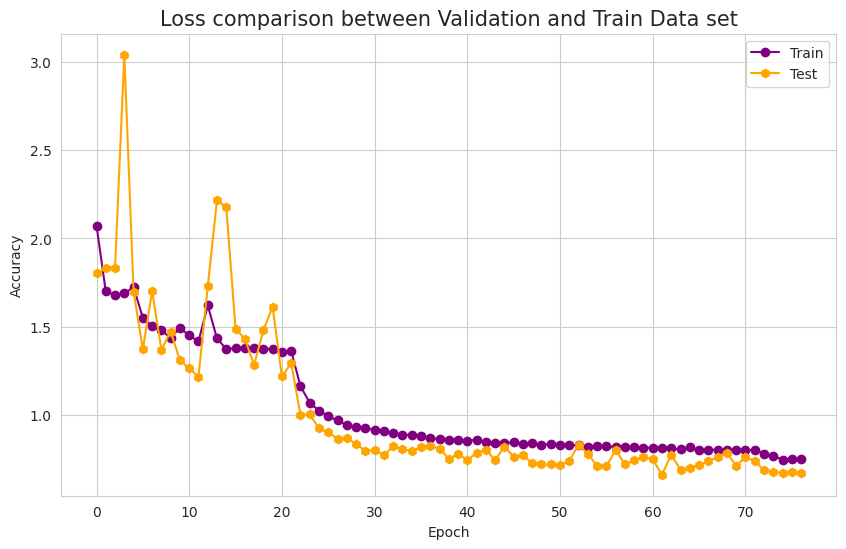

In [ ]:
save_results(history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

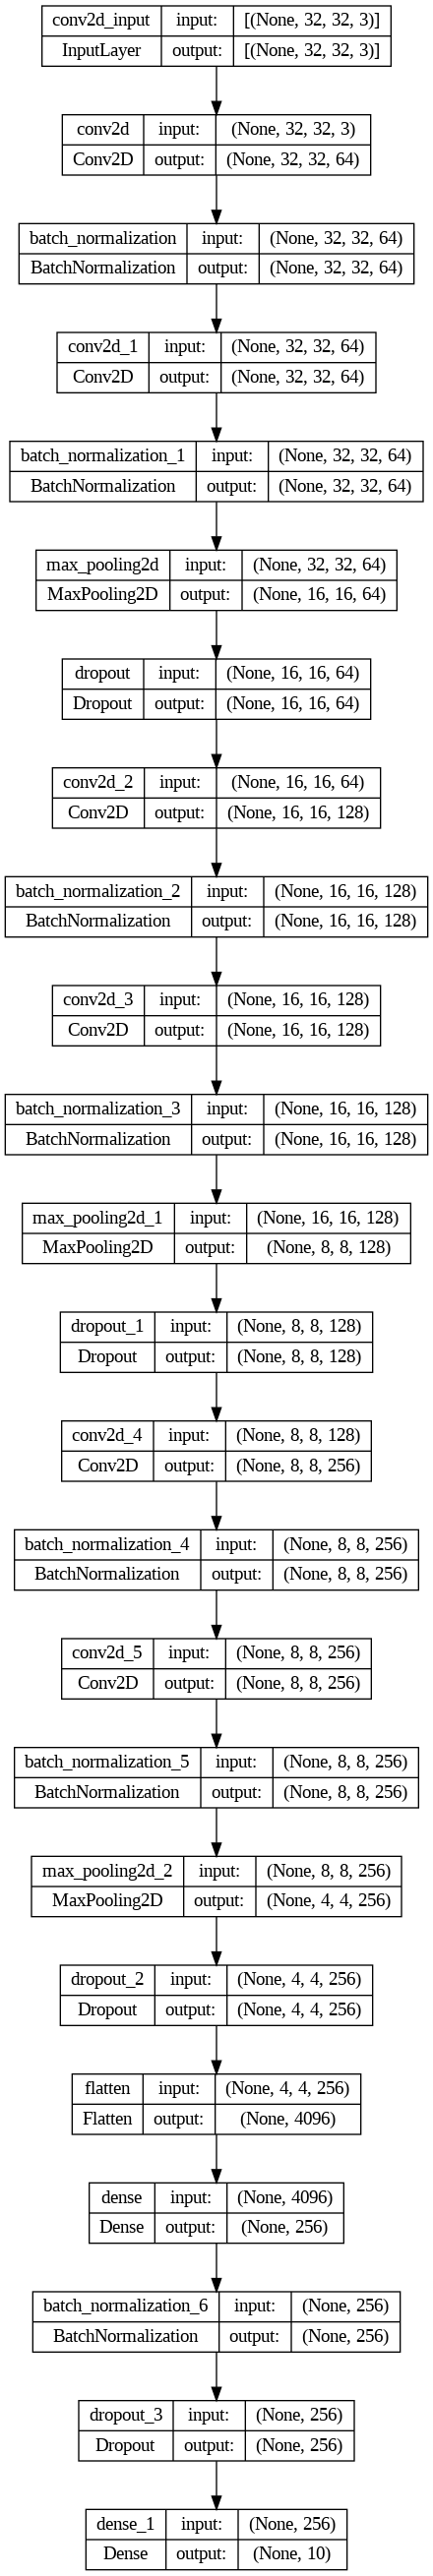

In [ ]:
custom_model.summary()
plot_model(custom_model, to_file='/content/gdrive/My Drive/Image Classification/without_tuning/custom_model_2.png', show_shapes=True)

In [ ]:
# Save best model
custom_model.save('/content/gdrive/My Drive/Colab_Models/without_tuning/final_model/final_model_2.h5')